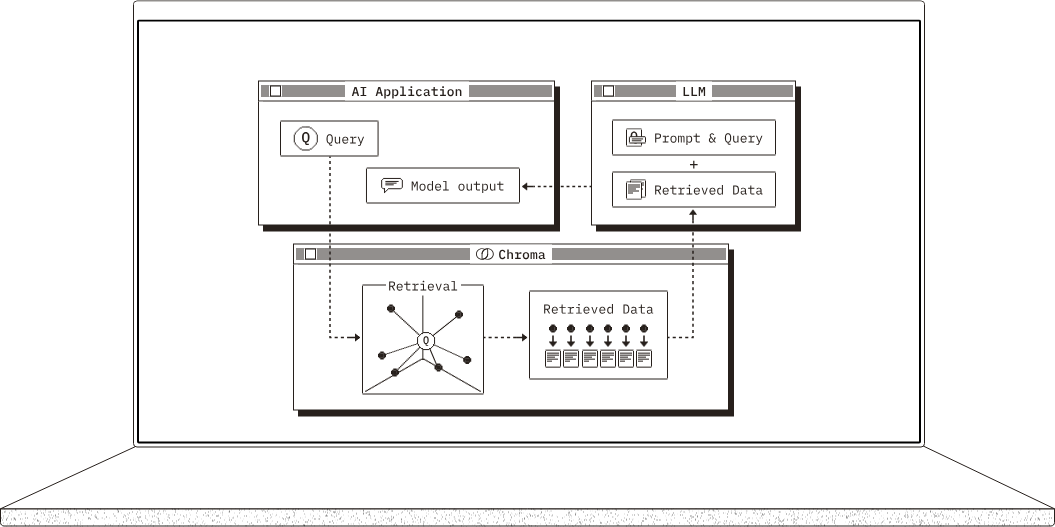

In [2]:
import chromadb
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(name="my_collection")


In [3]:
collection.add(
    documents=[
        "This is a document about pineapple",
        "This is a document about oranges"
    ],
    ids=["id1", "id2"]
)


C:\Users\User\.cache\chroma\onnx_models\all-MiniLM-L6-v2\onnx.tar.gz: 100%|██████████| 79.3M/79.3M [05:03<00:00, 274kiB/s] 


In [4]:
all_docs = collection.get()
all_docs

{'ids': ['id1', 'id2'],
 'embeddings': None,
 'documents': ['This is a document about pineapple',
  'This is a document about oranges'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [None, None]}

In [5]:
document = collection.get(ids=['id1'])
document

{'ids': ['id1'],
 'embeddings': None,
 'documents': ['This is a document about pineapple'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [None]}

In [7]:
results = collection.query(
    query_texts=["This is a query document about hawaii"], # Chroma will embed this for you
    n_results=2 # how many results to return
)
results


{'ids': [['id1', 'id2']],
 'embeddings': None,
 'documents': [['This is a document about pineapple',
   'This is a document about oranges']],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[1.0404009819030762, 1.2430799007415771]]}

In [12]:
collection.delete(ids=all_docs['ids'])
collection.get()

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

In [13]:
collection.add(
    documents=[
        "This is a document about pineapple",
        "This is a document about oranges"
    ],
    ids=["id1", "id2"],
    metadatas=[
        {'url':'https://en.wikipedia.org/wiki/Pineapple'},
        {'url':'https://en.wikipedia.org/wiki/Orange_(fruit)'}
    ]
)

In [14]:
result = collection.query(
    query_texts=["This is a query document about hawaii"], # Chroma will embed this for you
    n_results=2 # how many results to return
)
result


{'ids': [['id1', 'id2']],
 'embeddings': None,
 'documents': [['This is a document about pineapple',
   'This is a document about oranges']],
 'uris': None,
 'included': ['metadatas', 'documents', 'distances'],
 'data': None,
 'metadatas': [[{'url': 'https://en.wikipedia.org/wiki/Pineapple'},
   {'url': 'https://en.wikipedia.org/wiki/Orange_(fruit)'}]],
 'distances': [[1.040400743484497, 1.2430800199508667]]}